In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os

# US President

## Final File - Load

In [ ]:
cd ../../

In [3]:
final = gpd.read_file('./vest_va_2016/va_2016/va_2016_president.shp')
final

,COUNTYFP,LOCALITY,VTDST,PRECINCT,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREIMCM,G16PREGSTE,G16PREOWRI,geometry
0,001,Accomack County,000101,Chincoteague,502,1285,31,12,8,6,"POLYGON Z ((-75.42507 37.89957 0.00000, -75.42..."
1,001,Accomack County,000201,Atlantic,198,598,15,8,1,1,"POLYGON Z ((-75.59978 37.87664 0.00000, -75.59..."
2,001,Accomack County,000202,Greenbackville,342,753,19,5,8,3,"POLYGON Z ((-75.49919 37.93416 0.00000, -75.49..."
3,001,Accomack County,000301,New Church,808,640,24,5,3,6,"POLYGON Z ((-75.64987 37.92702 0.00000, -75.64..."
4,001,Accomack County,000401,Bloxom,160,370,10,4,1,0,"POLYGON Z ((-75.71556 37.87513 0.00000, -75.71..."
...,...,...,...,...,...,...,...,...,...,...,...
2451,153,Prince William County,000302,Potomac,2382,512,54,32,16,25,"POLYGON Z ((-77.32258 38.58021 0.00000, -77.32..."
2452,179,Stafford County,000302,WIDEWATER,1562,1248,103,33,18,20,"POLYGON Z ((-77.39428 38.47458 0.00000, -77.39..."
2453,179,Stafford County,000401,AQUIA,555,303,24,14,6,6,"POLYGON Z ((-77.39221 38.48583 0.00000, -77.39..."
2454,195,Wise County,000302,East Stone Gap,297,1555,22,16,9,10,"POLYGON Z ((-82.80429 36.83206 0.00000, -82.80..."


# Election Results: US President

## Read in election results

In [4]:
df = pd.read_csv('./vest_va_2016/Virginia_Elections_Database__2016_President_General_Election_including_precincts.csv')
df.head()

,County/City,Ward,Pct,Hillary R. Clinton,Donald J. Trump,Gary Johnson,Evan McMullin,Jill Stein,All Others,Total Votes Cast
0,NaN,NaN,NaN,Democratic,Republican,Libertarian,Independent,Green,NaN,NaN
1,Accomack County,-,101 - Chincoteague,444,"1,188",26,10,7,5,"1,680"
2,Accomack County,-,201 - Atlantic,175,553,13,7,1,1,750
3,Accomack County,-,202 - Greenbackville,302,697,17,4,7,3,"1,030"
4,Accomack County,-,301 - New Church,713,592,21,4,3,5,"1,338"


In [5]:
df['LOCALITY'] = df['County/City']
df['G16PREDCLI'] = df['Hillary R. Clinton']
df['G16PRERTRU'] = df['Donald J. Trump']
df['G16PRELJOH'] = df['Gary Johnson'] 
df['G16PREIMCM'] = df['Evan McMullin']
df['G16PREGSTE'] = df['Jill Stein']
df['G16PREOWRI'] = df['All Others']
df = df.iloc[1:]
df = df.drop(['County/City', 'Hillary R. Clinton', 'Donald J. Trump', 'Gary Johnson', 'Evan McMullin', 'Jill Stein', 'Ward',  'All Others', 'Total Votes Cast'], axis = 1)

df = df.fillna(value = 0)
county_dict = pd.Series(final['COUNTYFP'].values, index = final['LOCALITY']).to_dict()
df['COUNTYFP'] = df['LOCALITY'].map(county_dict)

df['G16PREDCLI'] = df['G16PREDCLI'].map(lambda x: str(x).replace(',', ''))
df['G16PRERTRU'] = df['G16PRERTRU'].map(lambda x: str(x).replace(',', ''))
df['G16PRELJOH'] = df['G16PRELJOH'].map(lambda x: str(x).replace(',', ''))
df['G16PREIMCM'] = df['G16PREIMCM'].map(lambda x: str(x).replace(',', ''))
df['G16PREGSTE'] = df['G16PREGSTE'].map(lambda x: str(x).replace(',', ''))
df['G16PREOWRI'] = df['G16PREOWRI'].map(lambda x: str(x).replace(',', ''))

df['G16PREDCLI'] = df['G16PREDCLI'].astype(str).astype(float).astype(int)
df['G16PRERTRU'] = df['G16PRERTRU'].astype(str).astype(float).astype(int)
df['G16PRELJOH'] = df['G16PRELJOH'].astype(str).astype(float).astype(int)
df['G16PREIMCM'] = df['G16PREIMCM'].astype(str).astype(float).astype(int)
df['G16PREGSTE'] = df['G16PREGSTE'].astype(str).astype(float).astype(int)
df['G16PREOWRI'] = df['G16PREOWRI'].astype(str).astype(float).astype(int)

df = df[df["LOCALITY"]!="TOTALS"]

df.head()

,Pct,LOCALITY,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREIMCM,G16PREGSTE,G16PREOWRI,COUNTYFP
1,101 - Chincoteague,Accomack County,444,1188,26,10,7,5,001
2,201 - Atlantic,Accomack County,175,553,13,7,1,1,001
3,202 - Greenbackville,Accomack County,302,697,17,4,7,3,001
4,301 - New Church,Accomack County,713,592,21,4,3,5,001
5,401 - Bloxom,Accomack County,141,342,9,3,1,0,001


In [6]:
column_list = ['G16PREDCLI', 'G16PRERTRU', 'G16PRELJOH', 'G16PREIMCM', 'G16PREGSTE', 'G16PREOWRI']

for val in column_list:
    vote_dif = df[val].sum()-final[val].sum()
    if (vote_dif == 0):
        print(val+": EQUAL")
    else:
        print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES")

G16PREDCLI: EQUAL
G16PRERTRU: EQUAL
G16PRELJOH: EQUAL
G16PREIMCM: EQUAL
G16PREGSTE: EQUAL
G16PREOWRI: EQUAL


In [7]:
print("Counties with differences printed below:")
diff_counties=[]
for i in column_list:
    diff = df.groupby(["LOCALITY"]).sum()[i]-final.groupby(["LOCALITY"]).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")

Counties with differences printed below:

All other races in all counties are equal


## Re allocate absentee votes

That for county where Abs or Prov has cd on end, so do other precinct names
so, create list of the precincts that have cd necessary
then assign new county name based on that ID

In [8]:
def add_cd_to_county(county_list, precinct, countyfp):
    if (countyfp in county_list):
        countyfp_cd = countyfp + '-' + precinct[-5:-1]
        return countyfp_cd
    else:
        countyfp_cd = countyfp
        return countyfp_cd

In [9]:
cd_abs_prov_prec = df[((df['Pct'].map(lambda x: 'Absentee' in str(x))) &(df['Pct'].map(lambda x: 'CD' in str(x)))) | ((df['Pct'].map(lambda x: 'Provisional' in str(x))) & (df['Pct'].map(lambda x: 'CD' in str(x))))]
county_with_cd_nec_list = list(cd_abs_prov_prec['COUNTYFP'])

df['countyfp_cd'] = df.apply(lambda row: add_cd_to_county(county_with_cd_nec_list, row['Pct'], row['COUNTYFP']), axis = 1)

absentee_and_prov = df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]
groupby_absentee_and_prov_tot = absentee_and_prov.groupby(['countyfp_cd']).sum()

groupby_county_df_tot = df.groupby(['countyfp_cd']).sum()
df_no_absent_or_provisional = df[(df['Pct'].map(lambda x: 'Absentee' not in str(x))) & (df['Pct'].map(lambda x: 'Provisional' not in str(x)))
                                & (df['LOCALITY'] != 'TOTALS')]
groupby_county_tot_no_absentee = df_no_absent_or_provisional.groupby('countyfp_cd').sum()

In [10]:
df_with_absentee_reallocated = df_no_absent_or_provisional.copy()
groupby_absentee_and_prov_tot.reset_index(inplace=True,drop=False)
groupby_county_tot_no_absentee.reset_index(inplace=True,drop=False)

to_dole_out_totals = groupby_absentee_and_prov_tot.copy()
precinct_specific_totals = groupby_county_tot_no_absentee.copy()

## PH CODE for vote allocation

#countyfp_cd
#df_no_absent_or_provisional

#Create some new columns for each of these races to deal with the allocation
for race in column_list:
    add_var = race+"_add"
    rem_var = race+"_rem"
    floor_var = race+"_floor"
    df_with_absentee_reallocated.loc[:,add_var]=0.0
    df_with_absentee_reallocated.loc[:,rem_var]=0.0
    df_with_absentee_reallocated.loc[:,floor_var]=0.0

#Iterate over the rows
#Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
for index, row in df_no_absent_or_provisional.iterrows():
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #Grab the district
        county_id = row["countyfp_cd"]
        #Get the denominator for the allocation (the precinct vote totals)
        denom = precinct_specific_totals.loc[precinct_specific_totals["countyfp_cd"]==county_id][race]
        #Get one of the numerators, how many districtwide votes to allocate
        numer = to_dole_out_totals.loc[to_dole_out_totals["countyfp_cd"]==county_id][race]
        #Get the vote totals for this race in this precinct
        val = df_with_absentee_reallocated.at[index,race]
        #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
        if ((float(denom)==0)):
            vote_share = 0
        else:
            vote_share = (float(val)/float(denom))*float(numer)
        df_with_absentee_reallocated.at[index,add_var] = vote_share
        #Take the decimal remainder of the allocation
        df_with_absentee_reallocated.at[index,rem_var] = vote_share%1
        #Take the floor of the allocation
        df_with_absentee_reallocated.at[index,floor_var] = np.floor(vote_share)

#After the first pass through, get the sums of the races by district to assist in the rounding            
first_allocation = pd.DataFrame(df_with_absentee_reallocated.groupby(["countyfp_cd"]).sum())

#Now we want to iterate district by district to work on rounding
county_list = list(to_dole_out_totals["countyfp_cd"].unique()) 

#Iterate over the district
for county in county_list:
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
        to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals["countyfp_cd"]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
        #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
        for index in df_with_absentee_reallocated.loc[df_with_absentee_reallocated["countyfp_cd"]==county][rem_var].nlargest(to_go).index:
            df_with_absentee_reallocated.at[index,add_var] = np.ceil(df_with_absentee_reallocated.at[index,add_var])

#Iterate over every race again
for race in column_list:
    add_var = race+"_add"
    #Round every allocation down to not add fractional votes
    df_with_absentee_reallocated.loc[:,add_var]=np.floor(df_with_absentee_reallocated.loc[:,add_var])
    df_with_absentee_reallocated.loc[:,race]+=df_with_absentee_reallocated.loc[:,add_var]

In [11]:
for val in column_list:
    vote_dif = df_with_absentee_reallocated[val].sum()-final[val].sum()
    if (vote_dif == 0):
        print(val+": EQUAL")
    else:
        print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES")
        
print("Columns with differences printed below:")


G16PREDCLI: EQUAL
G16PRERTRU: EQUAL
G16PRELJOH: EQUAL
G16PREIMCM: EQUAL
G16PREGSTE: EQUAL
G16PREOWRI: EQUAL
Columns with differences printed below:


In [12]:
diff_counties=[]
for i in column_list:
    diff = df_with_absentee_reallocated.groupby(["LOCALITY"]).sum()[i]-final.groupby(["LOCALITY"]).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")


All other races in all counties are equal


## Unique Identifier

In [13]:
def vtdst_changer(vtdst):
    if (vtdst[1:3] == ' -'):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[1:3] == '- '):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[-1:] == ' '):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    elif (vtdst[-1:] == '-'):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    else:
        return vtdst

In [14]:
#Isolating 3 digit VTDST code in election results as it appears in the shapefile and vest file, then creating unique id
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated.Pct.str.slice(stop = 3)
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated['vtdst'].apply(vtdst_changer)
df_with_absentee_reallocated['unique_id'] = df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['vtdst']
final['unique_id'] = final['COUNTYFP'] + final['VTDST'].str.slice(start = 3)

print('id in vest file not in df: ', set(final['unique_id']) - set(df_with_absentee_reallocated['unique_id']))
print('id in df not in vest file: ', set(df_with_absentee_reallocated['unique_id']) - set(final['unique_id']))

id in vest file not in df:  {'059700'}
id in df not in vest file:  set()


In [15]:
double_in_df = df_with_absentee_reallocated['unique_id'].value_counts()
df_double_list = double_in_df[double_in_df > 1].index
double_in_final = final['unique_id'].value_counts()
final_double_list = double_in_final[double_in_final > 1].index
print('doubled in vest file not doubled in df',set(final_double_list) - set(df_double_list))
print('doubled in df not doubled in vest file', set(df_double_list) - set(final_double_list))

doubled in vest file not doubled in df set()
doubled in df not doubled in vest file {'550045', '550019', '800403', '059925'}


In [16]:
#implement to increase number of unique values 
def vtdst_add_cd(unique_id, precinct, double_list):
    if (unique_id in double_list):
        unique_id = unique_id + precinct[-6:]
        return unique_id
    else:
        return unique_id

In [17]:
df_with_absentee_reallocated['unique_id_1'] = df_with_absentee_reallocated.apply(lambda row: vtdst_add_cd(row['unique_id'], row['Pct'], list(df_double_list)), axis = 1)
print('with cd, # unique ids in df: ', df_with_absentee_reallocated['unique_id_1'].nunique(), 'and without: ', df_with_absentee_reallocated['unique_id'].nunique())
final['unique_id_1'] = final.apply(lambda row: vtdst_add_cd(row['unique_id'], row['PRECINCT'], final_double_list), axis = 1)
print('with cd, # unique ids in vest file: ', final['unique_id_1'].nunique(), 'and without: ', final['unique_id'].nunique())

print('id in vest file not in df: ', set(final['unique_id_1']) - set(df_with_absentee_reallocated['unique_id_1']))
print('id in df not in vest file: ',set(df_with_absentee_reallocated['unique_id_1']) - set(final['unique_id_1']))

with cd, # unique ids in df:  2459 and without:  2434
with cd, # unique ids in vest file:  2456 and without:  2435
id in vest file not in df:  {'550019', '059925', '059700', '550045', '800403'}
id in df not in vest file:  {'550019(CD 4)', '800403(CD 3)', '550019(CD 3)', '550045(CD 3)', '059925CD 11)', '059925CD 10)', '800403(CD 4)', '550045(CD 4)'}


# Shapefile

<AxesSubplot:>

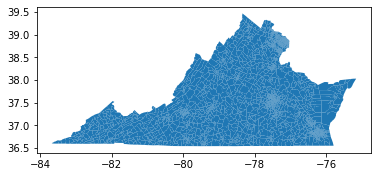

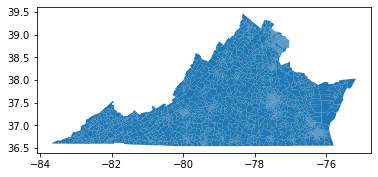

In [18]:
county_fips = []
for directory in os.listdir('./vest_va_2016/census_shps_by_county_all_unzip/'):
    if not directory[0] == '.':
        county_fips.append(directory[-5:])
        
proj = final.crs   

county_vtds = []
for i in county_fips: #i dont have fips_codes file
    ref = './vest_va_2016/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    vtd_ref = ref + i + '/PVS_19_v2_vtd_' + i + '.shp' 
    vtd_shp = gpd.read_file(vtd_ref)
    #print(i, ' added to list')
    county_vtds.append(vtd_shp)

global shp
shp = gpd.GeoDataFrame(pd.concat(county_vtds, axis = 0) , crs = proj) 

shp.plot()
final.plot()

In [19]:
shp['unique_id'] = shp['COUNTYFP'] + shp['VTDST'].str.slice(start = 3)
print('preliminary id in shp not in vest: ', len((set(shp.COUNTYFP + shp.VTDST.str.slice(start = 3)) - set(final.COUNTYFP + final.VTDST.str.slice(start = 3)))), 'shp length:', shp.shape[0])
print('preliminary id in vest not in shp: ', len((set(final.COUNTYFP + final.VTDST.str.slice(start = 3)) - set(shp.COUNTYFP + shp.VTDST.str.slice(start = 3)))), 'vest length', final.shape[0])

preliminary id in shp not in vest:  50 shp length: 2462
preliminary id in vest not in shp:  24 vest length 2456


# Set up to join

### Merge in df to match final

In [20]:
merge_in_df_match_final = {'059925CD 10)': '059925',
 '059925CD 11)': '059925',
 '550019(CD 3)': '550019',
 '550019(CD 4)': '550019',
 '550045(CD 3)': '550045',
 '550045(CD 4)': '550045',
 '800403(CD 3)': '800403',
 '800403(CD 4)': '800403'}

df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id_1'].isin(merge_in_df_match_final.keys()), 'unique_id_1'] = df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id_1'].isin(merge_in_df_match_final.keys()), 'unique_id_1'].map(merge_in_df_match_final)

print('id in df not in final:', set(df_with_absentee_reallocated['unique_id_1']) - set(final['unique_id_1']))
print('id in final not in df:', set(final['unique_id_1']) - set(df_with_absentee_reallocated['unique_id_1']))

id in df not in final: set()
id in final not in df: {'059700'}


### Check value counts in unique_id_1 column to sum election results into merge

In [21]:
double_in_df_1 = df_with_absentee_reallocated['unique_id_1'].value_counts()
df_double_list_1 = double_in_df_1[double_in_df_1 > 1].index

#remove rows with zero votes from df to help make df and vest match
df_remove_list = ['19 - Jolliff (CD 3)', '45 - Sunray Ii (CD 3)', '925 - Old Mill (CD 11)', '403 - Southside (CD 3)']
df_with_absentee_reallocated = df_with_absentee_reallocated[~df_with_absentee_reallocated['Pct'].isin(df_remove_list)]

In [22]:
tidy_cd_id_format_dict = {
 '059513CD 11)': '059513(CD 11)',
 '153110CD 10)': '153110(CD 10)',
 '153112CD 10)': '153112(CD 10)',
 '153210CD 11)': '153210(CD 11)',
 '153312CD 11)': '153312(CD 11)',
 '153609CD 11)': '153609(CD 11)',
}

df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id_1'].isin(tidy_cd_id_format_dict.keys()), 'unique_id_1'] = df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id_1'].isin(tidy_cd_id_format_dict.keys()), 'unique_id_1'].map(tidy_cd_id_format_dict)
final.loc[final['unique_id_1'].isin(tidy_cd_id_format_dict.keys()), 'unique_id_1'] = final.loc[final['unique_id_1'].isin(tidy_cd_id_format_dict.keys()), 'unique_id_1'].map(tidy_cd_id_format_dict)

### Now that id format tidied, load in CD in shp to create matching unique id

#### **Load in cd shp to enable splits later on**

<ipython-input-23-ffcaac5c5877>:16: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  overlay_w_shp = gpd.GeoDataFrame(pd.merge(overlay, shp, on = 'unique_id', how = 'outer'), crs = proj)


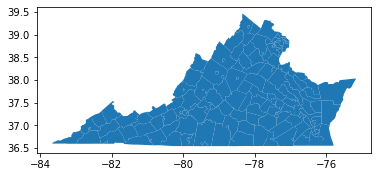

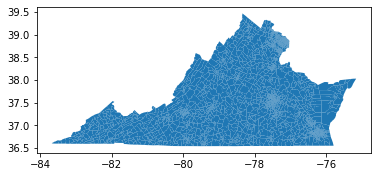

In [23]:
county_cd = []

for i in county_fips: #i dont have fips_codes file
    ref = './vest_va_2016/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    cd_ref = ref + i + '/PVS_19_v2_cd_' + i + '.shp' 
    cd_shp = gpd.read_file(cd_ref)
    #print(i, ' added to list')
    county_cd.append(cd_shp)
global cd
cd = gpd.GeoDataFrame(pd.concat(county_cd, axis = 0) , crs = proj) 

cd.plot()
overlay = gpd.overlay(cd, shp, how = 'union', make_valid = True, keep_geom_type = True)
overlay.plot()

overlay_w_shp = gpd.GeoDataFrame(pd.merge(overlay, shp, on = 'unique_id', how = 'outer'), crs = proj)
overlay_w_shp['unique_id_1'] = overlay_w_shp['unique_id'] + '(CD ' +overlay_w_shp['CDFP'].str.lstrip('0') + ')'
overlay_w_shp.loc[~overlay_w_shp['unique_id'].isin(df_double_list), 'unique_id_1'] = overlay_w_shp.loc[~overlay_w_shp['unique_id'].isin(df_double_list), 'unique_id']

### See how well id matches up to df

In [24]:
print('number of ids in shp not in df: ', len(set(overlay_w_shp['unique_id_1']) - set(df_with_absentee_reallocated['unique_id_1'])))
print('number of ids in df not in shp: ', len(set(df_with_absentee_reallocated['unique_id_1']) - set(overlay_w_shp['unique_id_1'])))

number of ids in shp not in df:  57
number of ids in df not in shp:  29


In [25]:
#Based on hand matching, dictionary between the two files to match more ids
overlay_w_shp_to_df_dict = {
    '059925(CD 10)': '059925',
    '077011': '077401',
    '077012': '077401',
    '095041': '095104',
    '095042(CD 2)': '095104',
    '107422': '107419',
    '153061': '153106',
    '191021': '191702',
    '191022': '191702',
    '520041':  '520004',
    '520042':  '520004',
    '550019(CD 4)': '550019',
    '550045(CD 4)': '550045',
    '685031': '685003',
    '685032': '685003',
    '800403(CD 4)': '800403'
}

In [26]:
overlay_w_shp.loc[overlay_w_shp['unique_id_1'].isin(overlay_w_shp_to_df_dict.keys()), 'unique_id_1'] = overlay_w_shp.loc[overlay_w_shp['unique_id_1'].isin(overlay_w_shp_to_df_dict.keys()), 'unique_id_1'].map(overlay_w_shp_to_df_dict)
overlay_w_shp['geometry'] = overlay_w_shp['geometry_x']
overlay_w_shp.loc[overlay_w_shp['geometry_x'] == None, 'geometry'] = overlay_w_shp.loc[overlay_w_shp['geometry_x'] == None, 'geometry_y']
overlay_w_shp = overlay_w_shp.dissolve(by = 'unique_id_1', as_index = False)

# Join shapefile and election results

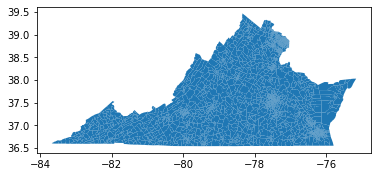

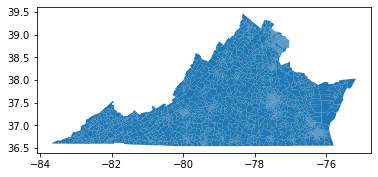

In [27]:
shp_df_merge = pd.merge(overlay_w_shp, df_with_absentee_reallocated, on = 'unique_id_1', how = 'outer', suffixes = ['_x', '_y'])
shp_df_merge["v"]
shp_df_gdf = gpd.GeoDataFrame(shp_df_merge, geometry = 'geometry')

shp_df_gdf.plot()
final.plot()
shp_df_gdf = shp_df_gdf.drop(['geometry_x', 'geometry_y'], axis = 1)

# Validation

## Shapefile

In [66]:
shp_final_merge = pd.merge(shp_df_gdf, final, on = 'unique_id_1', how = 'outer', suffixes = ['_x', '_y'],indicator=True)

In [67]:
print(shp_final_merge["_merge"].value_counts())

both          2456
left_only       41
right_only       0
Name: _merge, dtype: int64


In [68]:
both = shp_final_merge[shp_final_merge["_merge"]=="both"]
both.reset_index(drop=True,inplace=True)
source_geoms = gpd.GeoDataFrame(both,geometry="geometry_x",crs=final.crs)
vest_geoms = gpd.GeoDataFrame(both,geometry="geometry_y",crs=final.crs)
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

False    2376
True       80
dtype: int64


1) For 201 - Jack Jouett difference in area is 1.6392619510377389
2) For 504 - Free Bridge difference in area is 3.6426457486026322
3) For 604 - Brownsville difference in area is 2.571403443031483
4) For 301 - New London Academy (CD 6) difference in area is 6.39820347317318
5) For 213 - Southside (CD 7) difference in area is 1.1100188908965825
6) For 304 - Winfrees Store (CD 4) difference in area is 7.916663970014204
7) For 309 - Skinquarter (CD 7) difference in area is 11.69378938112867
8) For 402 - Genito (CD 7) difference in area is 2.248562299915324
9) For 301 - South difference in area is 2.47207267955882
10) For 401 - Central difference in area is 2.47207267955882
11) For 202 - Sandy Hook difference in area is 1.0661449758085542
12) For 401 - Shallow Well difference in area is 2.697575844323418
13) For 402 - Centerville difference in area is 2.69864432308448
14) For 801 - South Boston East difference in area is 1.6422049028742618
15) For 201 - Beaverdam difference in area is 1.20

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:384: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


23) For 101 - Farmville difference in area is 2.4946646019708445
24) For 201 - Lockett difference in area is 2.9363555643567
25) For 301 - Leigh difference in area is 2.9322856710127154
26) For 502 - Buffalo Hts difference in area is 2.2936352595016762
27) For 601 - Prospect difference in area is 1.163691737349352
28) For 103 - Glenvar (CD 9) difference in area is 1.1428642396626618
29) For 405 - Lindenwood (CD 6) difference in area is 1.0463424648641513
30) For 101 - Abbs Valley difference in area is 3.1086176677367914
31) For 103 - Boissevain difference in area is 10.754996805485767
32) For 303 - Wardell difference in area is 6.241275701138801
33) For 401 - Richlands difference in area is 5.178448422981906
34) For 6 - Deep Creek (CD 4) difference in area is 34.42277899661806
35) For 9 - Bells Mill (CD 4) difference in area is 2.8494320033778533
36) For 14 - Grassfield (CD 4) difference in area is 2.538696824575388
37) For 15 - B M Williams (CD 3) difference in area is 1.1457984206821

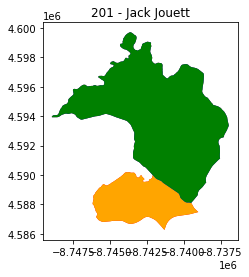

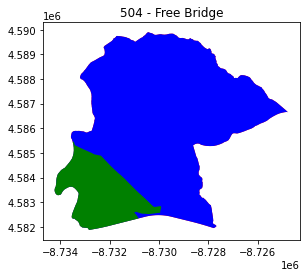

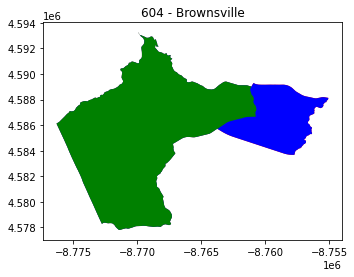

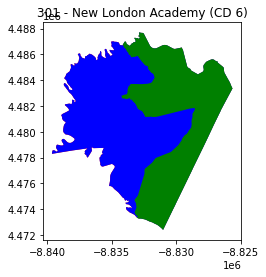

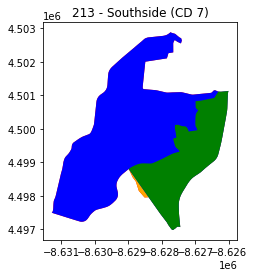

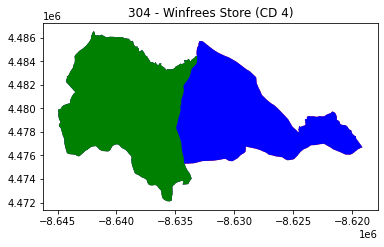

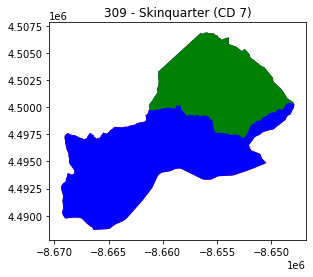

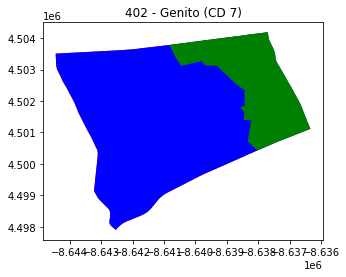

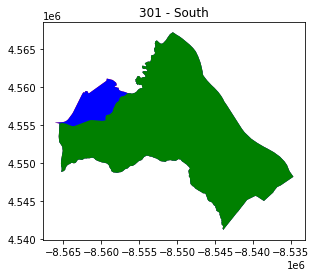

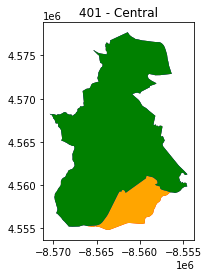

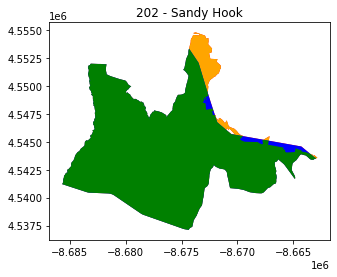

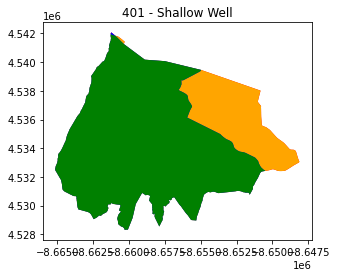

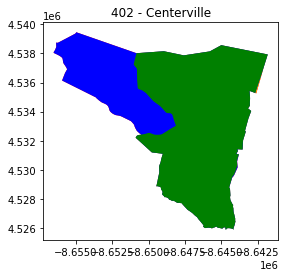

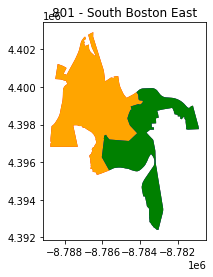

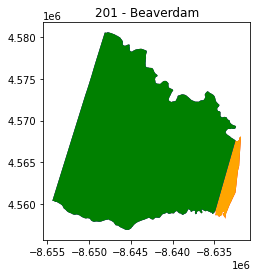

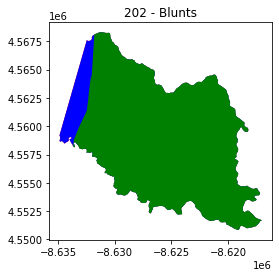

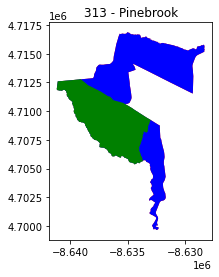

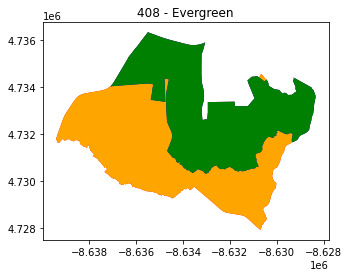

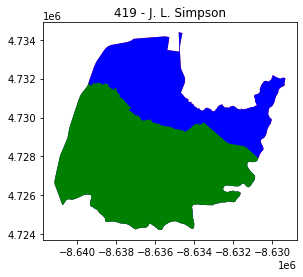

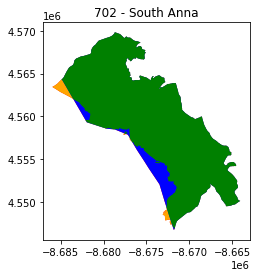

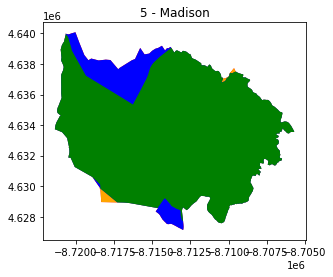

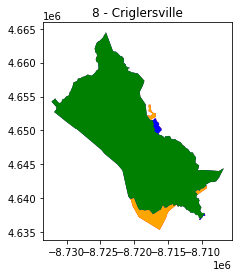

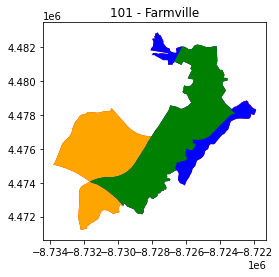

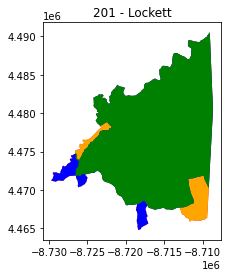

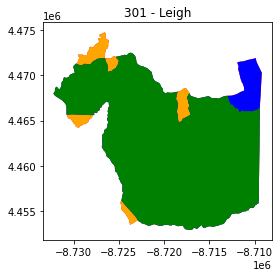

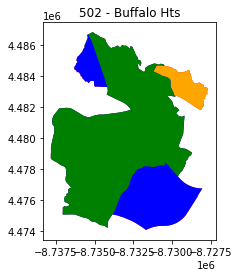

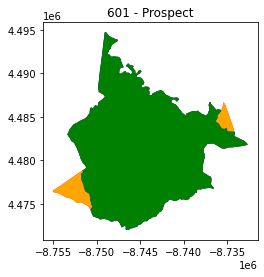

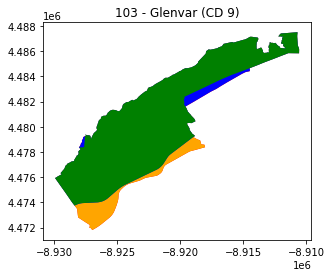

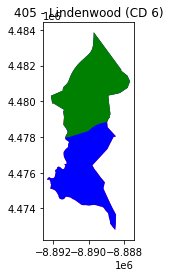

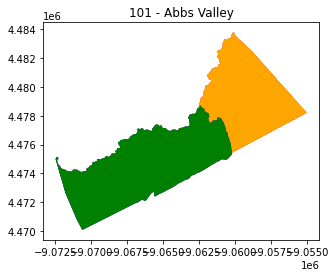

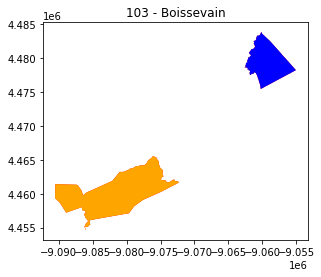

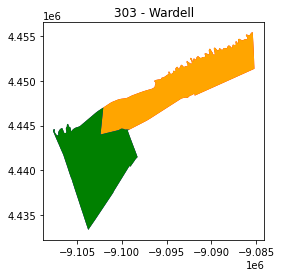

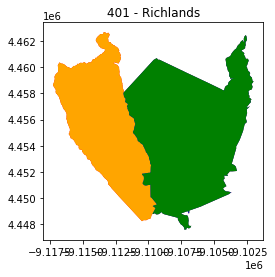

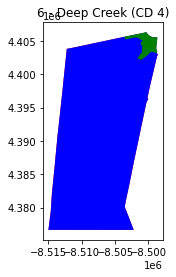

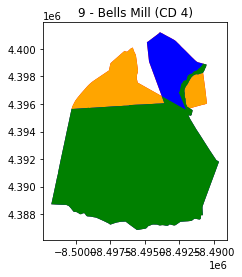

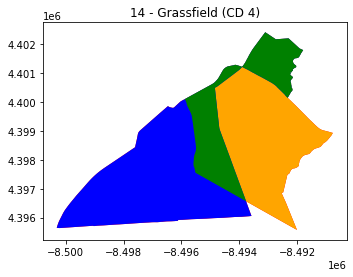

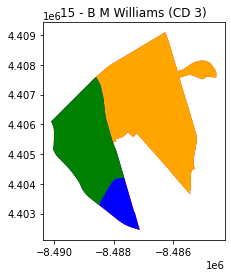

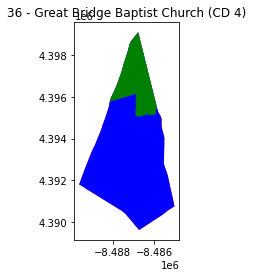

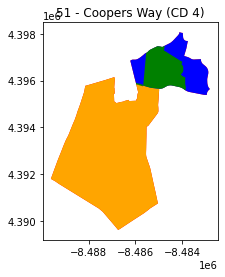

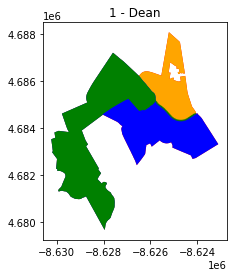

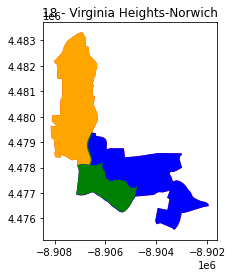

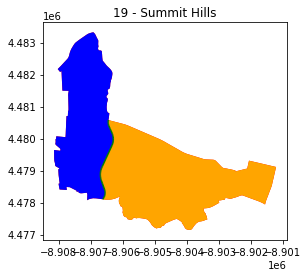

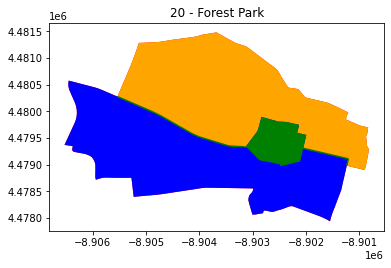

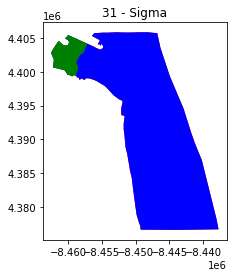

In [69]:
count = 0
area_list = []
big_diff = pd.DataFrame(columns=["area"])
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > 1):
        count += 1
        name = source_geoms.at[i,"Pct"]
        big_diff.loc[name]=area
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [70]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(2456, 1)
1789 precincts w/ a difference of 0 km^2
513 precincts w/ a difference between 0 and .1 km^2
68 precincts w/ a difference between .1 and .5 km^2
24 precincts w/ a difference between .5 and 1 km^2
18 precincts w/ a difference between 1 and 2 km^2
18 precincts w/ a difference between 2 and 5 km^2
8 precincts w/ a difference greater than 5 km^2


## Election result comparison

In [ ]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>0):
                    print(i, "{:.>72}".format(df.iloc[j]["Pct"]), "(V)","{:.>5}".format(int(df.iloc[j][right_Data]))," (S){:.>5}".format(int(df.iloc[j][left_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["Pct"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["Pct"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)

In [ ]:
column_list = ['G16PREDCLI', 'G16PRERTRU', 'G16PRELJOH', 'G16PREIMCM', 'G16PREGSTE', 'G16PREOWRI']
final_shp_merge = pd.merge(shp_df_gdf, final, on = 'unique_id_1', how = 'outer', suffixes = ('_x', '_y'))
validater_row(final_shp_merge, column_list)